In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### Load Data

In [25]:
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")

In [26]:
df_2015 = df_2015.copy()
df_2016 = df_2016.copy()
df_2017 = df_2017.copy()

# 2015 

In [27]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

### Review Data

In [28]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [29]:
df_2015.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [30]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

- For Happiness Score secure the most common scores without altering the figures in some form. For instance, rounding the data to two decimal places.

In [31]:
df_2015["Happiness Score"].round(2).value_counts().head(6)

5.19    3
4.51    3
6.30    3
6.94    2
6.00    2
4.57    2
Name: Happiness Score, dtype: int64

- This process reveals that whilst average (mean) is at around 5.41, the most common score (mode) was 5.89, thus the mode is higher the mean.

- Looking at the data visually, it seems that the data is centred around the 4-7. However unlike typical distributions it does not have a clear peak, which is likely to be due to the distribution of the mean and mode values.

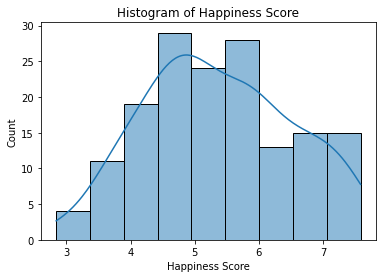

In [36]:
sns.histplot(df_2015["Happiness Score"], kde = True)
plt.title("Histogram of Happiness Score");

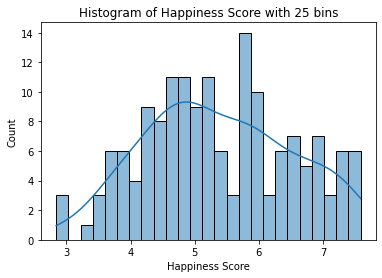

In [39]:
sns.histplot(df_2015["Happiness Score"], kde = True, bins = 25)
plt.title("Histogram of Happiness Score with 25 bins");

## Unhappy Nations

In [40]:
df_2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


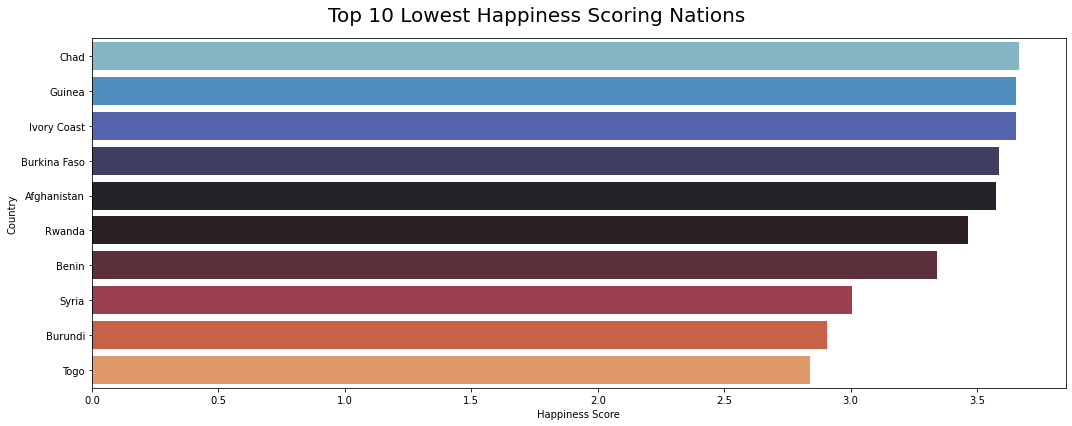

In [41]:
plt.figure(figsize = (15,6))
sns.barplot(y  = "Country", x = "Happiness Score", data = df_2015.tail(10), palette = "icefire")
plt.suptitle("Top 10 Lowest Happiness Scoring Nations", fontsize = 20)
plt.tight_layout()

- Investigating the table, no single factor appears to fully explain why these nations appear at the bottom of the list. There are some clues to indicate why these nations appear at the bottom of the list.
- For instance, 3 of the 5 nations have a "Freedom to make choices" rate that is below 25%, 0.308000. This can be emphasised further by looking at how lowest rating countries for Freedom to make choices.

In [42]:
LowFreedom = df_2015.sort_values(by = ["Freedom"], ascending = True).head(10)
LowFreedom

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.00000,0.13788,0.17922,1.95335
101,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.00000,1.80101
95,Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.06913,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808,2.06367
117,Sudan,Sub-Saharan Africa,118,4.550,0.06740,0.52107,1.01404,0.36878,0.10081,0.14660,0.19062,2.20857
136,Angola,Sub-Saharan Africa,137,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
80,Pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
134,Egypt,Middle East and Northern Africa,135,4.194,0.03260,0.88180,0.74700,0.61712,0.17288,0.06324,0.11291,1.59927
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017


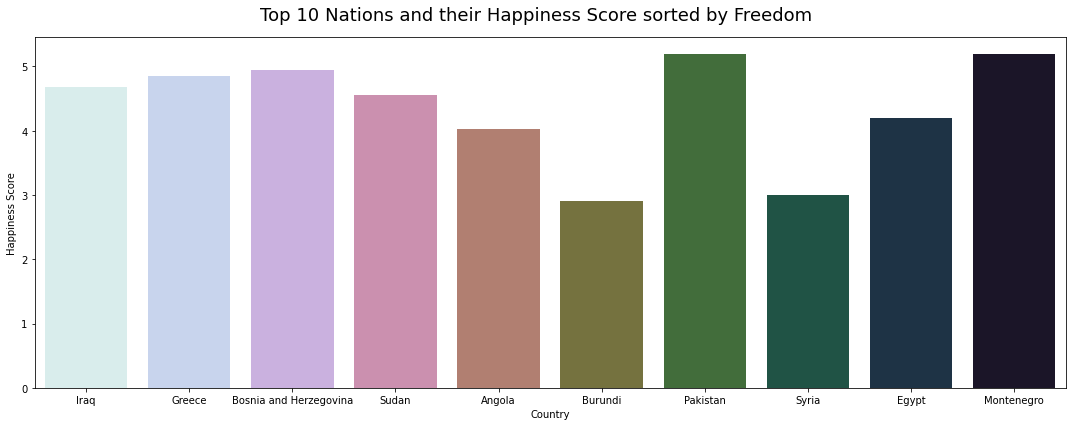

In [43]:
plt.figure(figsize=(15,6))
sns.barplot(x = "Country", y = "Happiness Score", data = LowFreedom, palette = "cubehelix_r")
plt.suptitle("Top 10 Nations and their Happiness Score sorted by Freedom", fontsize = 18)
plt.tight_layout()

### Economy (GDP per Capita)

In [45]:
LowGDP = df_2015.sort_values(by = ["Economy (GDP per Capita)"], ascending = True)
LowGDP.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.03680,0.00000,1.00120,0.09806,0.22605,0.07625,0.24834,2.86712
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
130,Malawi,Sub-Saharan Africa,131,4.292,0.06130,0.01604,0.41134,0.22562,0.43054,0.06977,0.33128,2.80791
143,Niger,Sub-Saharan Africa,144,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
115,Liberia,Sub-Saharan Africa,116,4.571,0.11068,0.07120,0.78968,0.34201,0.28531,0.06232,0.24362,2.77729


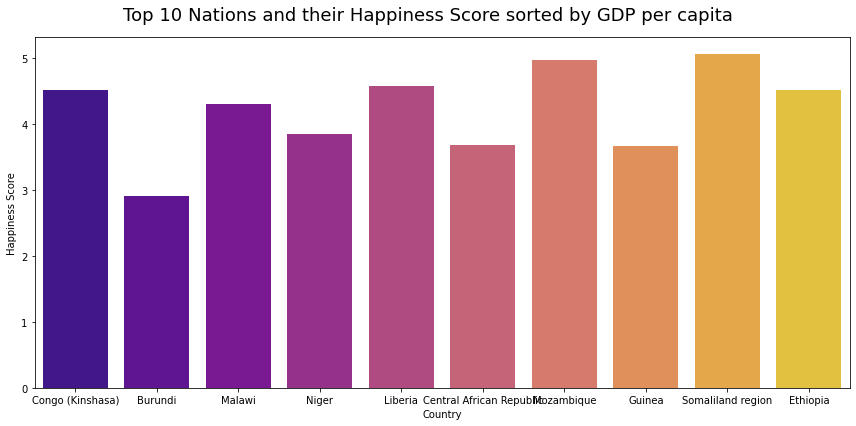

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x = "Country", y = "Happiness Score", data = LowGDP.head(10), palette = 'plasma')
plt.suptitle("Top 10 Nations and their Happiness Score sorted by GDP per capita", fontsize = 18)
plt.tight_layout()

Text(0.5, 1.0, 'Heatmap of correlation')

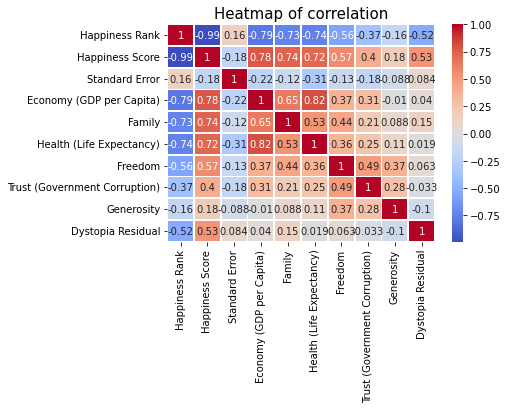

In [55]:
sns.heatmap(df_2015.corr(), cmap = "coolwarm", annot = True, linewidths=.8)
plt.title("Heatmap of correlation", fontsize = 15)

- According to this analysis, the economy is the factor that most affects the happiness rate.Then in order Family, Health, Freedom.

C:\Users\BARKIN\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\BARKIN\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


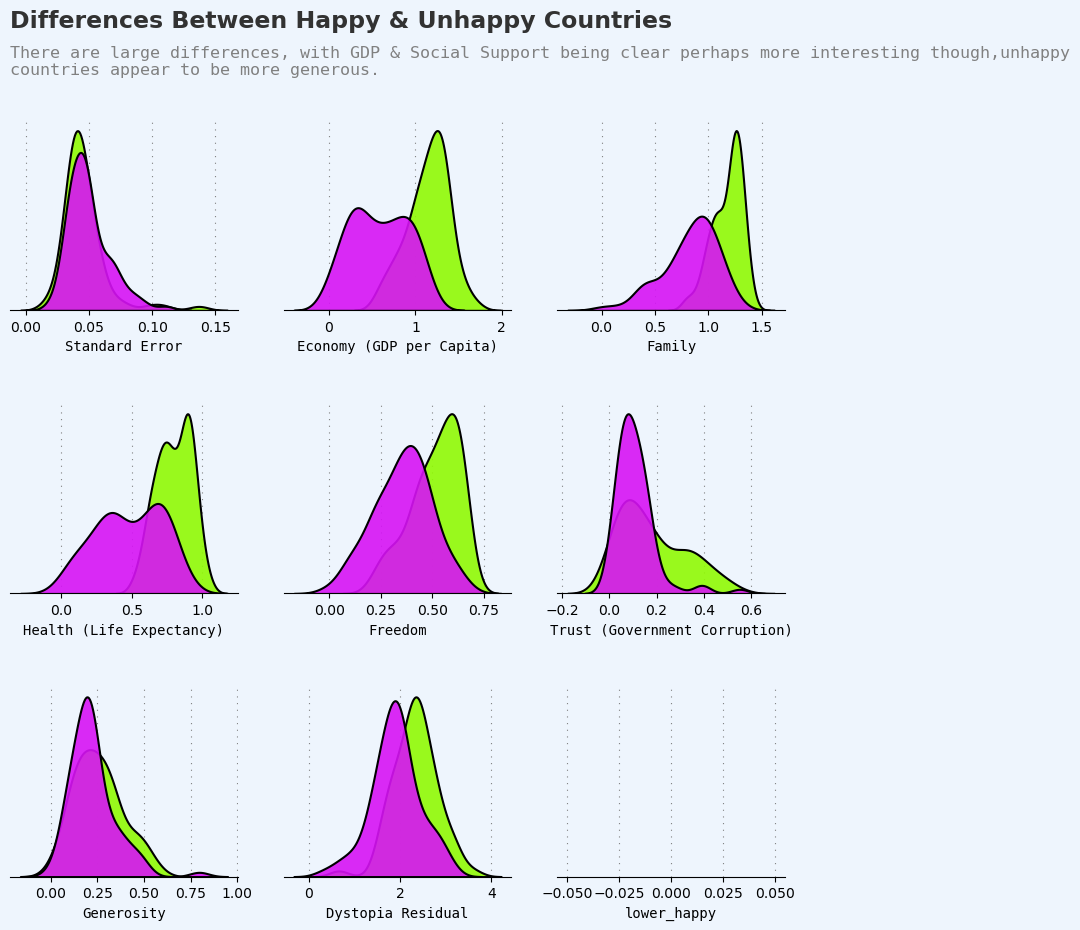

In [240]:
low_c = '#D713F5'
high_c = '#90FA04'
background_color = '#EEF5FD'
fig = plt.figure(figsize=(10, 10), dpi=100,facecolor=background_color)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.5)

newdata1 = df_2015.iloc[:,4:]
categorical = [var for var in newdata1.columns if newdata1[var].dtype=='O']
continuous = [var for var in newdata1.columns if newdata1[var].dtype!='O']

plot = 0
for row in range(0, 3):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        locals()["ax"+str(plot)].set_axisbelow(True)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

for variable in continuous:
        sns.kdeplot(Yes[variable],ax=locals()["ax"+str(plot)], color=high_c,ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(No[variable],ax=locals()["ax"+str(plot)], color=low_c, shade=True, ec='black',linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(plot)].set_xlabel(variable, fontfamily='monospace')
        plot += 1
        
Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.text(Xstart, Yend+(Yend*0.5), 'Differences Between Happy & Unhappy Countries', fontsize=17, fontweight='bold', fontfamily='sansserif',color='#323232')
ax0.text(Xstart, Yend+(Yend*0.25), 'There are large differences, with GDP & Social Support being clear perhaps more interesting though,unhappy\ncountries appear to be more generous.', fontsize=12, fontweight='light', fontfamily='monospace',color='gray')

plt.show()


### Analysis For 2015 With Tenserflow 

In [56]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 40)

In [110]:
x = df_2015.iloc[:,5:].values
y = df_2015["Happiness Score"].values.reshape(-1, 1)

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 40)

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [120]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [121]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [122]:
x_train.shape

(105, 7)

In [208]:
model = Sequential()

model.add(Dense(10,activation = "relu"))
model.add(Dense(10,activation = "relu"))
model.add(Dense(10,activation = "relu"))
model.add(Dense(10,activation = "relu"))



model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse")

In [209]:
model.fit(x = x_train, y = y_train, epochs = 300,validation_data = (x_test, y_test), verbose = 2)

Epoch 1/300
4/4 - 0s - loss: 0.3448 - val_loss: 0.3349 - 384ms/epoch - 96ms/step
Epoch 2/300
4/4 - 0s - loss: 0.3087 - val_loss: 0.3058 - 19ms/epoch - 5ms/step
Epoch 3/300
4/4 - 0s - loss: 0.2658 - val_loss: 0.2662 - 18ms/epoch - 4ms/step
Epoch 4/300
4/4 - 0s - loss: 0.2200 - val_loss: 0.2228 - 19ms/epoch - 5ms/step
Epoch 5/300
4/4 - 0s - loss: 0.1764 - val_loss: 0.1822 - 18ms/epoch - 4ms/step
Epoch 6/300
4/4 - 0s - loss: 0.1365 - val_loss: 0.1459 - 19ms/epoch - 5ms/step
Epoch 7/300
4/4 - 0s - loss: 0.1012 - val_loss: 0.1164 - 18ms/epoch - 5ms/step
Epoch 8/300
4/4 - 0s - loss: 0.0741 - val_loss: 0.0942 - 19ms/epoch - 5ms/step
Epoch 9/300
4/4 - 0s - loss: 0.0535 - val_loss: 0.0800 - 18ms/epoch - 4ms/step
Epoch 10/300
4/4 - 0s - loss: 0.0427 - val_loss: 0.0726 - 18ms/epoch - 4ms/step
Epoch 11/300
4/4 - 0s - loss: 0.0362 - val_loss: 0.0706 - 18ms/epoch - 4ms/step
Epoch 12/300
4/4 - 0s - loss: 0.0354 - val_loss: 0.0706 - 19ms/epoch - 5ms/step
Epoch 13/300
4/4 - 0s - loss: 0.0354 - val_loss

In [210]:
lossData = pd.DataFrame(model.history.history)

In [211]:
lossData.head()

,loss,val_loss
0,0.344773,0.334917
1,0.308659,0.305798
2,0.265809,0.266239
3,0.219981,0.222825
4,0.176445,0.182154


<AxesSubplot:>

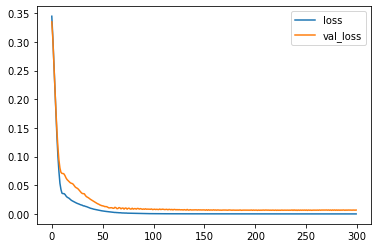

In [212]:
lossData.plot()

In [213]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [214]:
mean_absolute_error(y_test,predictSeries)

0.2655991076531561

- It can predict the happiness rate of countries with a 26 percent margin of error.